In [67]:
import wooldridge as woo
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms
import pandas as pd
import itertools
from sklearn.model_selection import KFold # import KFold
import math

ModuleNotFoundError: No module named 'simple_colors'

In [16]:
df = pd.read_csv('econmath_new.csv')
df

,age,work,study,econhs,colgpa,hsgpa,acteng,actmth,act,mathscr,male,calculus,attexc,attgood,fathcoll,mothcoll,score
0,23,15.0,10.0,0,3.4909,3.355,24.0,26.0,27.0,10,1,1,0,0,1,1,84.43
1,23,0.0,22.5,1,2.1000,3.219,23.0,20.0,24.0,9,1,0,0,0,0,1,57.38
2,21,25.0,12.0,0,3.0851,3.306,21.0,24.0,21.0,8,1,1,1,0,0,1,66.39
3,22,30.0,40.0,0,2.6805,3.977,31.0,28.0,31.0,10,0,1,0,1,1,1,81.15
4,22,25.0,15.0,1,3.7454,3.890,28.0,31.0,32.0,8,1,1,0,1,0,1,95.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,19,10.0,9.0,0,3.2115,3.000,20.0,19.0,21.0,5,1,0,0,1,1,0,79.69
852,19,20.0,5.0,1,2.3888,3.071,23.0,23.0,22.0,10,1,1,0,1,0,0,78.13
853,19,20.0,21.5,1,3.1785,2.971,22.0,27.0,22.0,10,0,1,0,1,1,0,68.75
854,19,0.0,10.0,1,2.5892,3.861,21.0,19.0,21.0,9,0,0,0,1,1,0,77.34


<Axes: >

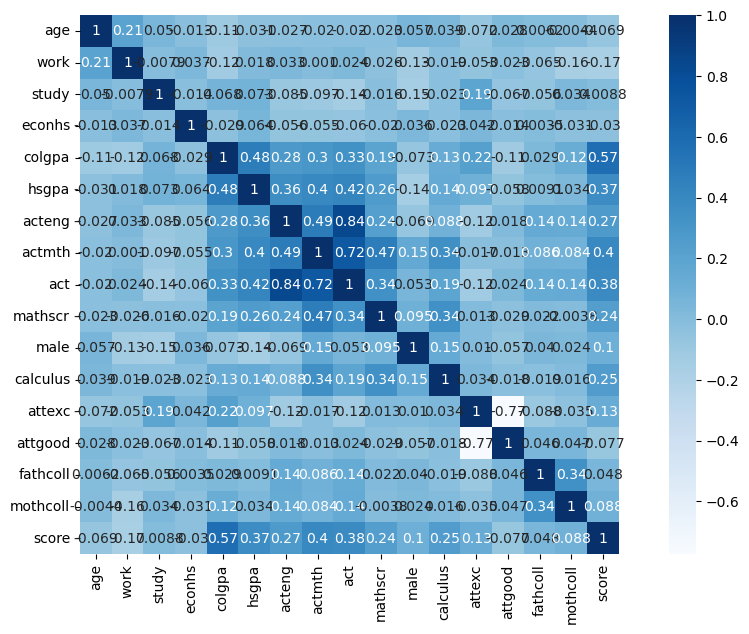

In [3]:
plt.figure(figsize=(13,7))
c= df.corr()
sns.heatmap(c,cmap="Blues",annot=True,square = True)

In [4]:
df1 = df[['econhs','male','calculus','attexc','attgood','fathcoll','mothcoll','score']]
df1

,econhs,male,calculus,attexc,attgood,fathcoll,mothcoll,score
0,0,1,1,0,0,1,1,84.43
1,1,1,0,0,0,0,1,57.38
2,0,1,1,1,0,0,1,66.39
3,0,0,1,0,1,1,1,81.15
4,1,1,1,0,1,0,1,95.90
...,...,...,...,...,...,...,...,...
851,0,1,0,0,1,1,0,79.69
852,1,1,1,0,1,0,0,78.13
853,1,0,1,0,1,1,0,68.75
854,1,0,0,0,1,1,0,77.34


In [5]:
# Load your dataset
y = df1['score']
X = df1[['econhs', 'male', 'calculus', 'attexc', 'attgood','fathcoll','mothcoll']]
# Define the maximum size of subsets you want to consider
max_subset_size = 3  # For example, up to 3 predictors in each subset

# Create all possible combinations of subsets
subsets = []
cp_values = []

for subset_size in range(3, max_subset_size + 1):
    for subset in itertools.combinations(X.columns, subset_size):
        X_subset = X[list(subset)]
        model = sm.OLS(y, sm.add_constant(X_subset)).fit()
        n = len(y)
        p = len(model.params)
        sse = np.sum(model.resid ** 2)
        cp = (1 / n) * (sse + 2 * p * (sse / (n - p)))
        subsets.append(subset)
        cp_values.append(cp)

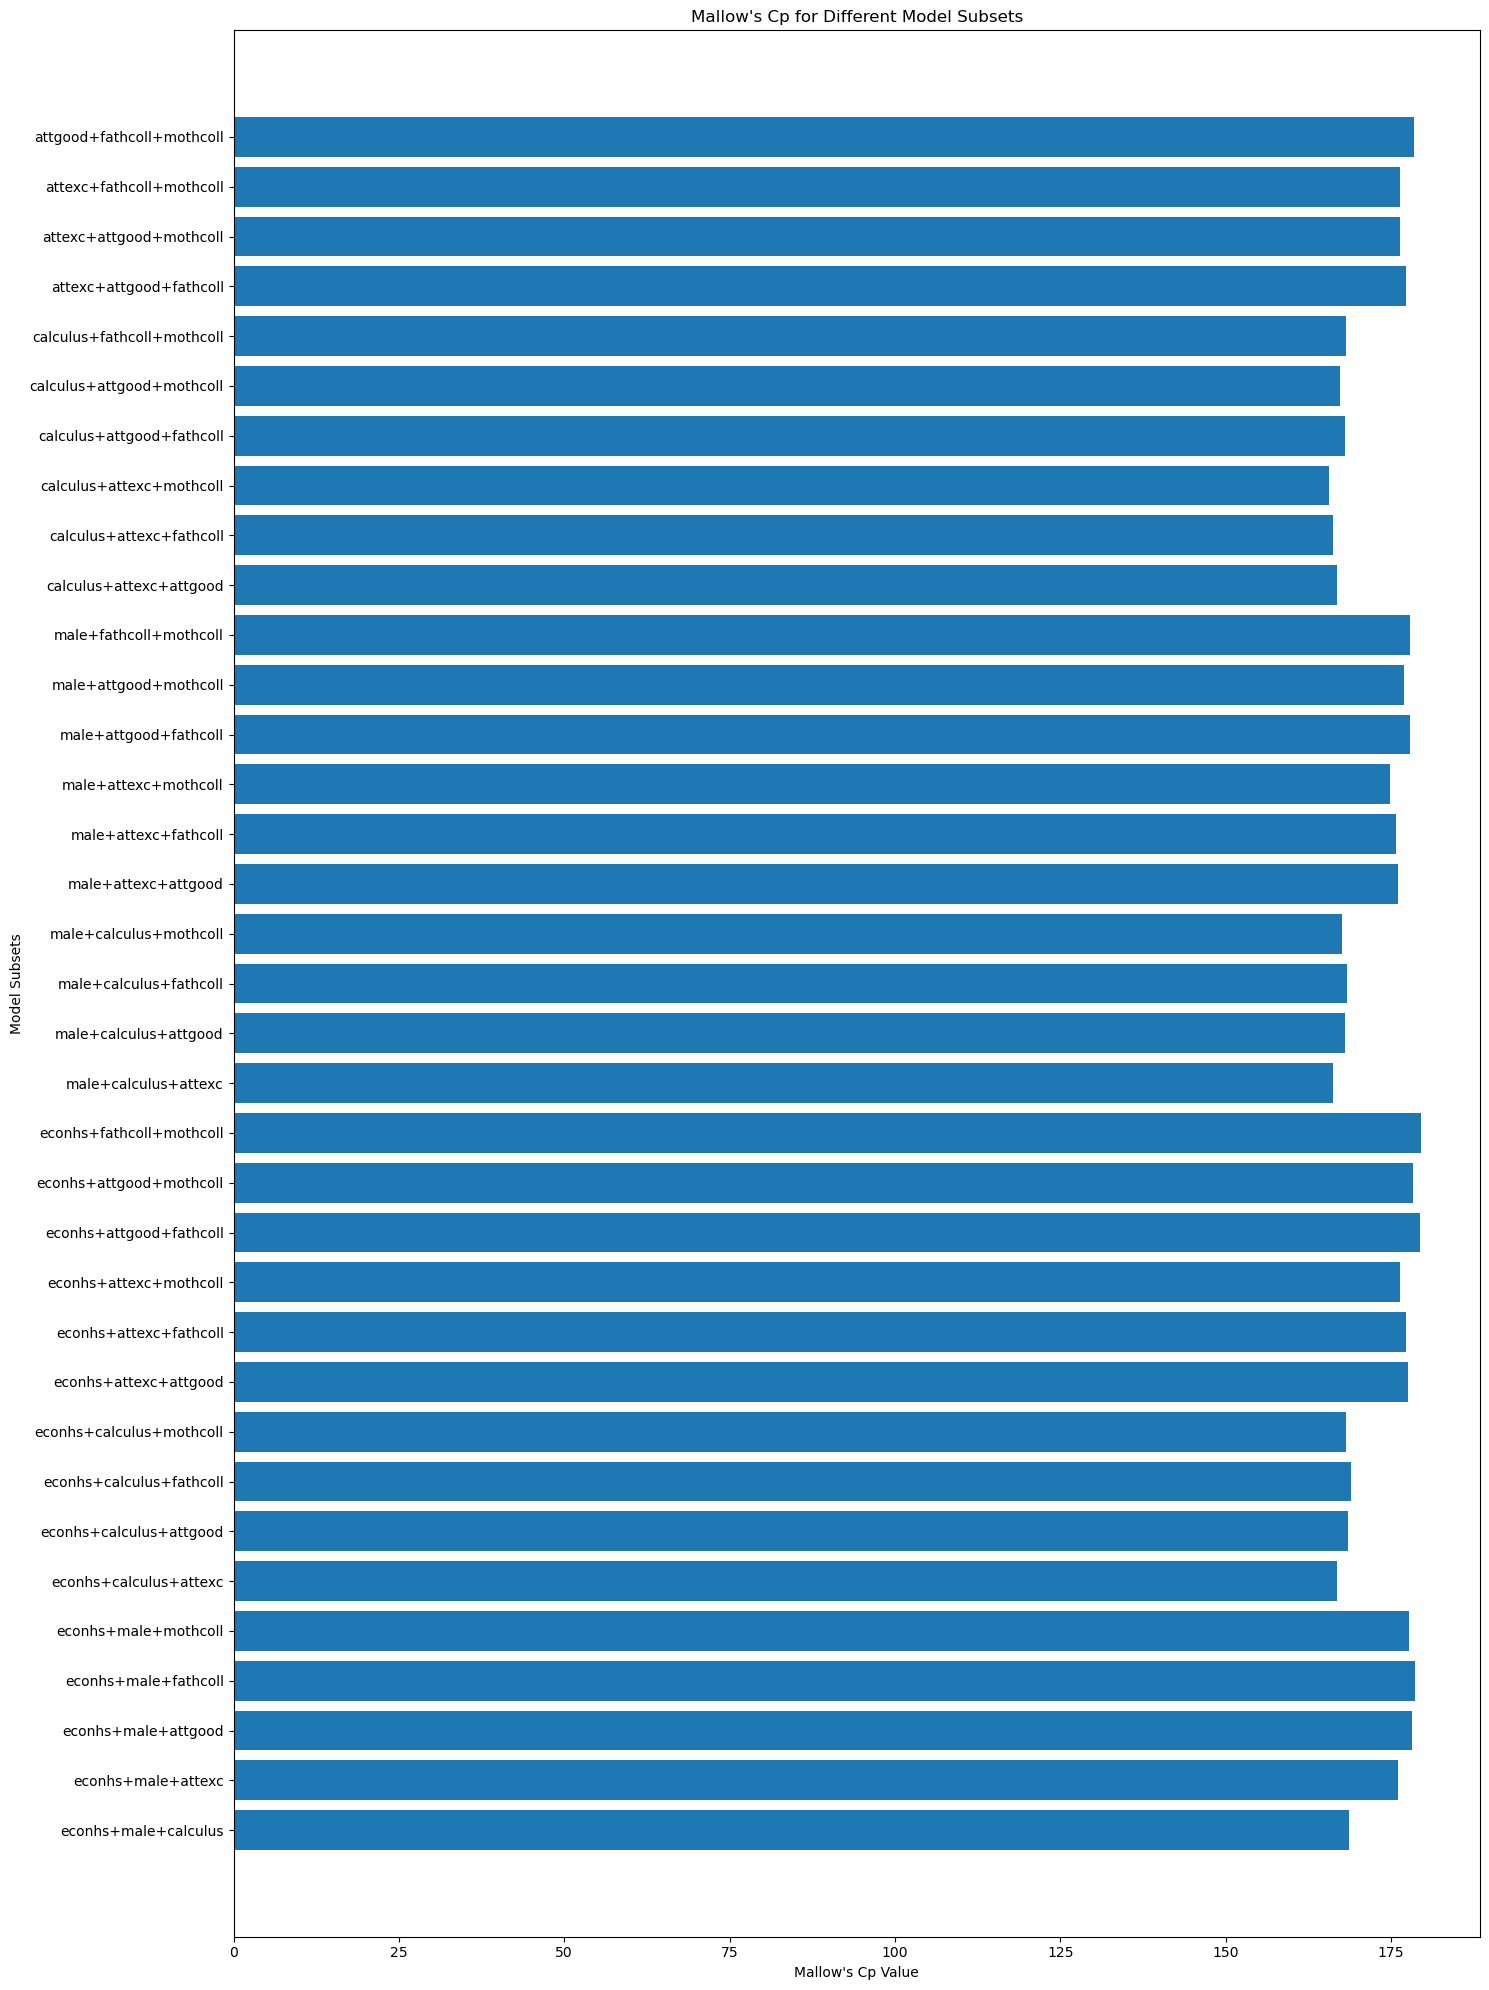

In [8]:
# Create a bar chart to visualize Cp values
subset_labels = ['+'.join(subset) for subset in subsets]
plt.figure(figsize=(15, 20))
plt.barh(subset_labels, cp_values)
plt.xlabel("Mallow's Cp Value")
plt.ylabel("Model Subsets")
plt.title("Mallow's Cp for Different Model Subsets")
plt.tight_layout()
plt.show()

In [9]:
import os
os.environ['R_HOME'] = 'D:/R-4.3.1'

In [10]:
#library to use R in Python 
import rpy2

import warnings
warnings.filterwarnings('ignore')

from rpy2.robjects import pandas2ri
import rpy2.rinterface as rinterface
pandas2ri.activate()

%load_ext rpy2.ipython

In [11]:
%%R
library(AER)
library(broom)
library(leaps)

Exception ignored from cffi callback <function _consolewrite_ex at 0x000001BA81159760>:
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 133, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\rpy2\rinterface_lib\conversion.py", line 138, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).decode(encoding)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd4 in position 0: invalid continuation byte
Exception ignored from cffi callback <function _consolewrite_ex at 0x000001BA81159760>:
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 133, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
        ^^^^^^^^^^^^^^^^^^^^^^^^^

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

In addition: Warning messages:


In [37]:
%%R
data <- read.csv("C:/Users/jerry/430/Assignment2/econmath_new.csv", as.is = TRUE)


         Abbreviation
econhs              e
male               ml
calculus            c
attexc           attx
attgood          attg
fathcoll            f
mothcoll           mt


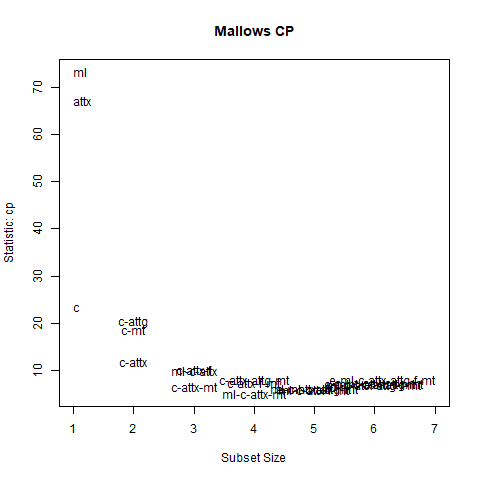

In [38]:
%%R
mreg.mod5 <- lm(score~econhs+male+calculus+attexc+attgood+fathcoll+mothcoll,data=data)
ss=regsubsets(score~econhs+male+calculus+attexc+attgood+fathcoll+mothcoll,,method=c("exhaustive"),nbest=3,data=data)
subsets(ss,statistic="cp",legend=F,main="Mallows CP",col="steelblue4")

In [17]:
# Specify the Model
reg_mod = smf.ols(formula='score ~ econhs+male+calculus+attexc+attgood+fathcoll+mothcoll', data=df)
reg_fit = reg_mod.fit()
# Look at the Model Fit Summary
print(reg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     12.37
Date:                 周二, 21 11月 2023   Prob (F-statistic):           3.86e-15
Time:                        16:46:26   Log-Likelihood:                -3394.1
No. Observations:                 856   AIC:                             6804.
Df Residuals:                     848   BIC:                             6842.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.2540      1.645     38.461      0.0

In [18]:
df = df[['mathscr','act','actmth','colgpa','male','calculus','attexc','mothcoll','score']]
df

,mathscr,act,actmth,colgpa,male,calculus,attexc,mothcoll,score
0,10,27.0,26.0,3.4909,1,1,0,1,84.43
1,9,24.0,20.0,2.1000,1,0,0,1,57.38
2,8,21.0,24.0,3.0851,1,1,1,1,66.39
3,10,31.0,28.0,2.6805,0,1,0,1,81.15
4,8,32.0,31.0,3.7454,1,1,0,1,95.90
...,...,...,...,...,...,...,...,...,...
851,5,21.0,19.0,3.2115,1,0,0,0,79.69
852,10,22.0,23.0,2.3888,1,1,0,0,78.13
853,10,22.0,27.0,3.1785,0,1,0,0,68.75
854,9,21.0,19.0,2.5892,0,0,0,0,77.34


In [19]:
# Specify the Model
reg_mod = smf.ols(formula='score ~ mathscr+act+actmth+colgpa+male+calculus+attexc+mothcoll', data=df)
reg_fit = reg_mod.fit()
print(reg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     73.97
Date:                 周二, 21 11月 2023   Prob (F-statistic):           3.24e-92
Time:                        16:46:30   Log-Likelihood:                -3208.9
No. Observations:                 856   AIC:                             6436.
Df Residuals:                     847   BIC:                             6479.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8423      2.884      4.800      0.0

1.model

In [39]:
%%R
library(AER)
library(broom)
econmath <- read.csv("C:/Users/jerry/430/Assignment2/data1.csv", as.is = TRUE)

In [82]:
mod = smf.ols(formula='score ~ mathscr+act+actmth+colgpa+male+calculus+attexc+mothcoll', data=df)
fit = mod.fit()
print(reg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     118.3
Date:                 周二, 21 11月 2023   Prob (F-statistic):           5.33e-95
Time:                        17:59:43   Log-Likelihood:                -3209.6
No. Observations:                 856   AIC:                             6431.
Df Residuals:                     850   BIC:                             6460.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.2727      2.806      5.087      0.0

2.multicolinearity

In [55]:
%%R
mreg.mod1=lm(score ~ mathscr+act+actmth+colgpa+male+calculus+attexc+mothcoll, data=econmath)
tidy(vif(mreg.mod1))

Exception ignored from cffi callback <function _consolewrite_ex at 0x000001BA81159760>:
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 133, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\rpy2\rinterface_lib\conversion.py", line 138, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).decode(encoding)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 12: invalid start byte


# A tibble: 8 x 2
  names        x
  <chr>    <dbl>
1 mathscr   1.36
2 act       2.30
3 actmth    2.57
4 colgpa    1.26
5 male      1.06
6 calculus  1.21
7 attexc    1.11
8 mothcoll  1.04


In addition: Warning message:


We don't need to worry about multicolinearity in this linear model.

3.model2

mathscr, attexc and mothcoll is not significant. Building model2 without them

In [52]:
reg_mod = smf.ols(formula='score ~ act+actmth+colgpa+male+calculus', data=df)
reg_fit = reg_mod.fit()
print(reg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     118.3
Date:                 周二, 21 11月 2023   Prob (F-statistic):           5.33e-95
Time:                        17:25:21   Log-Likelihood:                -3209.6
No. Observations:                 856   AIC:                             6431.
Df Residuals:                     850   BIC:                             6460.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.2727      2.806      5.087      0.0

In [53]:
%%R
mreg.mod2=lm(score ~ act+actmth+colgpa+male+calculus, data=econmath)

3.Residuals plot

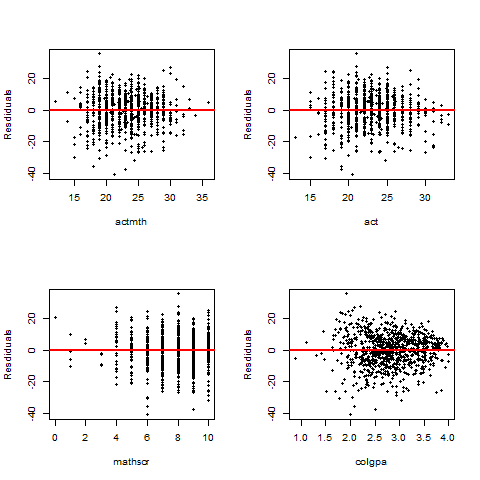

In [57]:
%%R
par(mfrow=c(2,2))
plot(econmath$actmth, mreg.mod1$residuals, pch=20,ylab="Resdiduals", xlab="actmth")
abline(h=0,col="red", lwd=2)

plot(econmath$act, mreg.mod1$residuals, pch=20,ylab="Resdiduals", xlab="act")
abline(h=0,col="red", lwd=2)

plot(econmath$mathscr, mreg.mod1$residuals, pch=20,ylab="Resdiduals", xlab="mathscr")
abline(h=0,col="red", lwd=2)

plot(econmath$colgpa, mreg.mod1$residuals, pch=20,ylab="Resdiduals", xlab="colgpa")
abline(h=0,col="red", lwd=2)

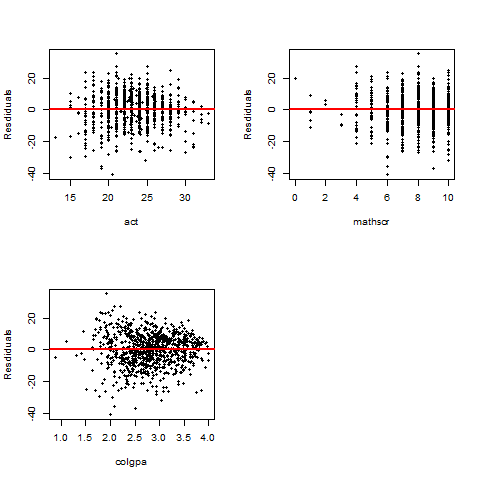

In [60]:
%%R
par(mfrow=c(2,2))
plot(econmath$act, mreg.mod2$residuals, pch=20,ylab="Resdiduals", xlab="act")
abline(h=0,col="red", lwd=2)

plot(econmath$mathscr, mreg.mod2$residuals, pch=20,ylab="Resdiduals", xlab="mathscr")
abline(h=0,col="red", lwd=2)

plot(econmath$colgpa, mreg.mod2$residuals, pch=20,ylab="Resdiduals", xlab="colgpa")
abline(h=0,col="red", lwd=2)

4.mis

In [61]:
%%R
resettest(mreg.mod2 , power=2, type="regressor")


	RESET test

data:  mreg.mod2
RESET = 5.6173, df1 = 5, df2 = 845, p-value = 4.206e-05



According to the result, we may need an interaction term or a quadratic term. We will talk about this later.

5.q-q plot

[1]  49 632 653


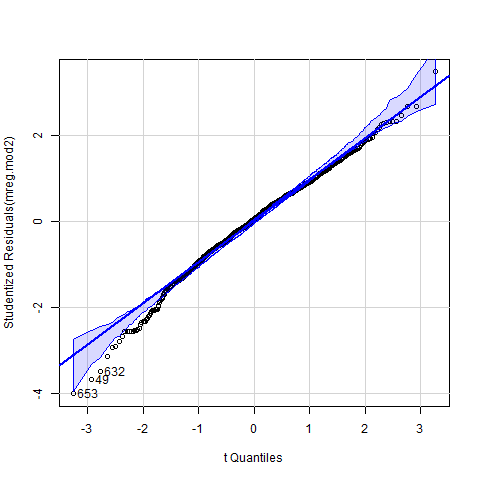

In [63]:
%%R
qqPlot(mreg.mod2, id=list(n=3))

In [65]:
%%R
AIC(mreg.mod1,mreg.mod2)

          df      BIC
mreg.mod1 10 6485.390
mreg.mod2  7 6466.403


In [66]:
%%R
BIC(mreg.mod1,mreg.mod2)

          df      BIC
mreg.mod1 10 6485.390
mreg.mod2  7 6466.403


6.Heteroskedasticity

In [70]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(reg_fit.resid, reg_fit.model.exog)
print(list(zip(name, test)))

[('Lagrange multiplier statistic', 54.76469389197331), ('p-value', 1.4592643001422864e-10), ('f-value', 11.619555317474038), ('f p-value', 7.05924080936472e-11)]


7.Robust Estimation

Compare the traditional SE vs. the White SE

In [72]:
reg_mod = smf.ols(formula='score ~ act+actmth+colgpa+male+calculus', data=df)

# estimate default model (only for spring data):
results_default = reg_mod.fit()

table_default = pd.DataFrame({'b': round(results_default.params, 5),
                              'se': round(results_default.bse, 5),
                              't': round(results_default.tvalues, 5),
                              'pval': round(results_default.pvalues, 5)})
print(f'Default Estimatws & Std. Errors: \n{table_default}\n')

# estimate model with White SE (only for spring data):
results_white = reg_mod.fit(cov_type='HC1')

table_white = pd.DataFrame({'b': round(results_white.params, 5),
                            'se': round(results_white.bse, 5),
                            't': round(results_white.tvalues, 5),
                            'pval': round(results_white.pvalues, 5)})
print(f'White Estimaets & Std. Errors: \n{table_white}\n')

Default Estimatws & Std. Errors: 
                  b       se         t     pval
Intercept  14.27269  2.80591   5.08665  0.00000
act         0.41029  0.15884   2.58305  0.00996
actmth      0.45521  0.14673   3.10231  0.00198
colgpa     12.36634  0.70492  17.54293  0.00000
male        2.55293  0.72460   3.52322  0.00045
calculus    3.22655  0.81093   3.97884  0.00008

White Estimaets & Std. Errors: 
                  b       se         t     pval
Intercept  14.27269  3.17161   4.50013  0.00001
act         0.41029  0.15930   2.57560  0.01001
actmth      0.45521  0.14215   3.20226  0.00136
colgpa     12.36634  0.74910  16.50826  0.00000
male        2.55293  0.72372   3.52751  0.00042
calculus    3.22655  0.82110   3.92952  0.00009



In [ ]:
Weighted Least-Squares (known form of the variance)

In [78]:
# Estimate model:
results_ols= reg_mod.fit(cov_type='HC0')

table_ols = pd.DataFrame({'b': round(results_ols.params, 4),
                          'se': round(results_ols.bse, 4),
                          't': round(results_ols.tvalues, 4),
                          'pval': round(results_ols.pvalues, 4)})
print(f'table_ols: \n{table_ols}\n')

# WLS: here we use w = 1/colgpa
wls_weight = list(1 / df['colgpa'])
reg_wls = smf.wls(formula='score ~ act+actmth+colgpa+male+calculus',
                  weights=wls_weight, data=df)
results_wls = reg_wls.fit()

# print regression table:
table_wlscolgpa = pd.DataFrame({'b': round(results_wls.params, 4),
                          'se': round(results_wls.bse, 4),
                          't': round(results_wls.tvalues, 4),
                          'pval': round(results_wls.pvalues, 4)})
print(f'table_wlscolgpa: \n{table_wlscolgpa}\n')

# WLS: here we use w = 1/act
wls_weight = list(1 / df['act'])
reg_wls = smf.wls(formula='score ~ act+actmth+colgpa+male+calculus',
                  weights=wls_weight, data=df)
results_wls = reg_wls.fit()

# print regression table:
table_wlsact = pd.DataFrame({'b': round(results_wls.params, 4),
                          'se': round(results_wls.bse, 4),
                          't': round(results_wls.tvalues, 4),
                          'pval': round(results_wls.pvalues, 4)})
print(f'table_wlsact: \n{table_wlsact}\n')

# WLS: here we use w = 1/actmth
wls_weight = list(1 / df['actmth'])
reg_wls = smf.wls(formula='score ~ act+actmth+colgpa+male+calculus',
                  weights=wls_weight, data=df)
results_wls = reg_wls.fit()

# print regression table:
table_wlsactmth = pd.DataFrame({'b': round(results_wls.params, 4),
                          'se': round(results_wls.bse, 4),
                          't': round(results_wls.tvalues, 4),
                          'pval': round(results_wls.pvalues, 4)})
print(f'table_wlsactmth: \n{table_wlsactmth}\n')

table_ols: 
                 b      se        t    pval
Intercept  14.2727  3.1605   4.5160  0.0000
act         0.4103  0.1587   2.5847  0.0097
actmth      0.4552  0.1417   3.2135  0.0013
colgpa     12.3663  0.7465  16.5664  0.0000
male        2.5529  0.7212   3.5399  0.0004
calculus    3.2265  0.8182   3.9434  0.0001

table_wlscolgpa: 
                 b      se        t    pval
Intercept  13.3222  2.8406   4.6900  0.0000
act         0.5088  0.1646   3.0903  0.0021
actmth      0.4467  0.1520   2.9381  0.0034
colgpa     11.9889  0.7053  16.9991  0.0000
male        2.3693  0.7537   3.1434  0.0017
calculus    3.2634  0.8414   3.8787  0.0001

table_wlsact: 
                 b      se        t    pval
Intercept  11.7427  2.7993   4.1949  0.0000
act         0.5452  0.1627   3.3506  0.0008
actmth      0.4036  0.1503   2.6857  0.0074
colgpa     12.5319  0.7212  17.3766  0.0000
male        2.6919  0.7368   3.6534  0.0003
calculus    3.3349  0.8205   4.0646  0.0001

table_wlsactmth: 
          

Feasible Generalized Least-Squares (unknown form of the variance)

线性模型（不包括mathscore）

In [79]:
# estimate model:
results_ols= reg_mod.fit()

# FGLS (estimation of the variance function):
df['logu2'] = np.log(results_ols.resid ** 2)
reg_fgls = smf.ols(formula='logu2 ~ act+actmth+colgpa+male+calculus', data=df)
results_fgls = reg_fgls.fit()
table_fgls = pd.DataFrame({'b': round(results_fgls.params, 4),
                           'se': round(results_fgls.bse, 4),
                           't': round(results_fgls.tvalues, 4),
                           'pval': round(results_fgls.pvalues, 4)})
print(f'FGLS (Variance Function): \n{table_fgls}\n')

# FGLS (WLS):
wls_weight = list(1 / np.exp(results_fgls.fittedvalues))
reg_wls = smf.wls(formula='score ~ act+actmth+colgpa+male+calculus',
                  weights=wls_weight, data=df)
results_wls = reg_wls.fit()
table_wls = pd.DataFrame({'b': round(results_wls.params, 4),
                          'se': round(results_wls.bse, 4),
                          't': round(results_wls.tvalues, 4),
                          'pval': round(results_wls.pvalues, 4)})
print(f'FGLS Estimates: \n{table_wls}\n')

FGLS (Variance Function): 
                b      se        t    pval
Intercept  6.4166  0.5844  10.9801  0.0000
act       -0.0488  0.0331  -1.4737  0.1409
actmth    -0.0189  0.0306  -0.6186  0.5364
colgpa    -0.5846  0.1468  -3.9818  0.0001
male      -0.0098  0.1509  -0.0651  0.9481
calculus   0.2206  0.1689   1.3062  0.1918

FGLS Estimates: 
                 b      se        t    pval
Intercept  17.7764  2.7259   6.5212  0.0000
act         0.1469  0.1465   1.0028  0.3162
actmth      0.5163  0.1366   3.7796  0.0002
colgpa     12.7893  0.6743  18.9663  0.0000
male        3.0004  0.6714   4.4690  0.0000
calculus    2.9467  0.7367   3.9998  0.0001



In [80]:
print(results_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.425
Model:                            WLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     125.6
Date:                 周二, 21 11月 2023   Prob (F-statistic):           1.50e-99
Time:                        17:57:21   Log-Likelihood:                -3183.6
No. Observations:                 856   AIC:                             6379.
Df Residuals:                     850   BIC:                             6408.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.7764      2.726      6.521      0.0

二次模型（不包括mathscore）

In [87]:
# Feasible Generalized Least-Squares (unknown form of the variance)
results_ols= mod.fit()

# FGLS (estimation of the variance function):
df['logu2'] = np.log(results_ols.resid ** 2)
reg_fgls = smf.ols(formula='logu2 ~ act+actmth+colgpa+male+calculus', data=df)
results_fgls = reg_fgls.fit()
table_fgls = pd.DataFrame({'b': round(results_fgls.params, 4),
                           'se': round(results_fgls.bse, 4),
                           't': round(results_fgls.tvalues, 4),
                           'pval': round(results_fgls.pvalues, 4)})
print(f'FGLS (Variance Function): \n{table_fgls}\n')

# FGLS (WLS):
wls_weight = list(1 / np.exp(results_fgls.fittedvalues))
reg_wls = smf.wls(formula='score~ act + I(act**2) + actmth + male + colgpa + calculus',
                  weights=wls_weight, data=df)
results_wls = reg_wls.fit()
table_wls = pd.DataFrame({'b': round(results_wls.params, 4),
                          'se': round(results_wls.bse, 4),
                          't': round(results_wls.tvalues, 4),
                          'pval': round(results_wls.pvalues, 4)})
print(f'FGLS Estimates: \n{table_wls}\n')

FGLS (Variance Function): 
                b      se        t    pval
Intercept  6.7834  0.5926  11.4467  0.0000
act       -0.0569  0.0335  -1.6954  0.0904
actmth    -0.0275  0.0310  -0.8889  0.3743
colgpa    -0.5902  0.1489  -3.9641  0.0001
male      -0.0119  0.1530  -0.0775  0.9382
calculus   0.2567  0.1713   1.4987  0.1343

FGLS Estimates: 
                   b       se        t    pval
Intercept   -31.3150  13.0164  -2.4058  0.0163
act           4.2648   1.0764   3.9623  0.0001
I(act ** 2)  -0.0845   0.0217  -3.8878  0.0001
actmth        0.5360   0.1348   3.9765  0.0001
male          3.0740   0.6626   4.6390  0.0000
colgpa       12.6225   0.6658  18.9594  0.0000
calculus      2.7392   0.7270   3.7679  0.0002



In [88]:
print(results_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.435
Model:                            WLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     109.1
Date:                 周二, 21 11月 2023   Prob (F-statistic):          7.73e-102
Time:                        18:09:49   Log-Likelihood:                -3179.3
No. Observations:                 856   AIC:                             6373.
Df Residuals:                     849   BIC:                             6406.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -31.3150     13.016     -2.406      

二次+交互模型（包括mathscore）

In [120]:
# Feasible Generalized Least-Squares (unknown form of the variance)
results_ols= mod.fit()

# FGLS (estimation of the variance function):
df['logu2'] = np.log(results_ols.resid ** 2)
reg_fgls = smf.ols(formula='logu2 ~ mathscr + act+actmth+colgpa+male+calculus', data=df)
results_fgls = reg_fgls.fit()
table_fgls = pd.DataFrame({'b': round(results_fgls.params, 4),
                           'se': round(results_fgls.bse, 4),
                           't': round(results_fgls.tvalues, 4),
                           'pval': round(results_fgls.pvalues, 4)})
print(f'FGLS (Variance Function): \n{table_fgls}\n')

# FGLS (WLS):
wls_weight = list(1 / np.exp(results_fgls.fittedvalues))
reg_wls = smf.wls(formula='score~ mathscr + act + I(act**2) + actmth + colgpa + male*colgpa + calculus + male*calculus + male',
                  weights=wls_weight, data=df)
results_wls = reg_wls.fit()
table_wls = pd.DataFrame({'b': round(results_wls.params, 4),
                          'se': round(results_wls.bse, 4),
                          't': round(results_wls.tvalues, 4),
                          'pval': round(results_wls.pvalues, 4)})
print(f'FGLS Estimates: \n{table_wls}\n')

FGLS (Variance Function): 
                b      se        t    pval
Intercept  6.8613  0.6072  11.2998  0.0000
mathscr   -0.0298  0.0502  -0.5934  0.5531
act       -0.0567  0.0336  -1.6900  0.0914
actmth    -0.0222  0.0323  -0.6874  0.4920
colgpa    -0.5854  0.1491  -3.9252  0.0001
male      -0.0108  0.1531  -0.0703  0.9440
calculus   0.2784  0.1752   1.5890  0.1124

FGLS Estimates: 
                     b       se        t    pval
Intercept     -29.5216  13.0274  -2.2661  0.0237
mathscr         0.0997   0.2310   0.4314  0.6663
act             4.4641   1.0728   4.1613  0.0000
I(act ** 2)    -0.0880   0.0217  -4.0615  0.0001
actmth          0.5009   0.1395   3.5914  0.0003
colgpa         10.8084   0.9284  11.6422  0.0000
male           -4.1755   3.8774  -1.0769  0.2818
male:colgpa     3.1744   1.2490   2.5416  0.0112
calculus        4.4657   0.9758   4.5763  0.0000
male:calculus  -3.5316   1.3866  -2.5469  0.0110



In [121]:
print(results_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.443
Model:                            WLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     74.68
Date:                 周二, 21 11月 2023   Prob (F-statistic):          3.04e-101
Time:                        19:04:06   Log-Likelihood:                -3173.8
No. Observations:                 856   AIC:                             6368.
Df Residuals:                     846   BIC:                             6415.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -29.5216     13.027     -2.266

二次+交互模型（不包括mathscore）

In [128]:
# Feasible Generalized Least-Squares (unknown form of the variance)
results_ols= mod.fit()

# FGLS (estimation of the variance function):
df['logu2'] = np.log(results_ols.resid ** 2)
reg_fgls = smf.ols(formula='logu2 ~ act+actmth+colgpa+male+calculus', data=df)
results_fgls = reg_fgls.fit()
table_fgls = pd.DataFrame({'b': round(results_fgls.params, 4),
                           'se': round(results_fgls.bse, 4),
                           't': round(results_fgls.tvalues, 4),
                           'pval': round(results_fgls.pvalues, 4)})
print(f'FGLS (Variance Function): \n{table_fgls}\n')

# FGLS (WLS):
wls_weight = list(1 / np.exp(results_fgls.fittedvalues))
reg_wls = smf.wls(formula='score~ act + I(act**2) + actmth + colgpa + male*colgpa + calculus + male*calculus + male',
                  weights=wls_weight, data=df)
results_wls = reg_wls.fit()
table_wls = pd.DataFrame({'b': round(results_wls.params, 4),
                          'se': round(results_wls.bse, 4),
                          't': round(results_wls.tvalues, 4),
                          'pval': round(results_wls.pvalues, 4)})
print(f'FGLS Estimates: \n{table_wls}\n')

FGLS (Variance Function): 
                b      se        t    pval
Intercept  6.7834  0.5926  11.4467  0.0000
act       -0.0569  0.0335  -1.6954  0.0904
actmth    -0.0275  0.0310  -0.8889  0.3743
colgpa    -0.5902  0.1489  -3.9641  0.0001
male      -0.0119  0.1530  -0.0775  0.9382
calculus   0.2567  0.1713   1.4987  0.1343

FGLS Estimates: 
                     b       se        t    pval
Intercept     -28.5742  12.9999  -2.1980  0.0282
act             4.3936   1.0713   4.1011  0.0000
I(act ** 2)    -0.0869   0.0216  -4.0137  0.0001
actmth          0.5311   0.1340   3.9635  0.0001
colgpa         10.8399   0.9270  11.6936  0.0000
male           -4.1800   3.8735  -1.0791  0.2808
male:colgpa     3.1868   1.2485   2.5524  0.0109
calculus        4.5329   0.9663   4.6909  0.0000
male:calculus  -3.5825   1.3854  -2.5860  0.0099



In [129]:
print(results_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.443
Model:                            WLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     84.31
Date:                 周二, 21 11月 2023   Prob (F-statistic):          2.10e-102
Time:                        19:17:25   Log-Likelihood:                -3173.1
No. Observations:                 856   AIC:                             6364.
Df Residuals:                     847   BIC:                             6407.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -28.5742     13.000     -2.198

二次+交互模型（额外添加了attexc）

In [124]:
# Feasible Generalized Least-Squares (unknown form of the variance)
results_ols= mod.fit()

# FGLS (estimation of the variance function):
df['logu2'] = np.log(results_ols.resid ** 2)
reg_fgls = smf.ols(formula='logu2 ~ act+actmth+colgpa+attexc+male+calculus', data=df)
results_fgls = reg_fgls.fit()
table_fgls = pd.DataFrame({'b': round(results_fgls.params, 4),
                           'se': round(results_fgls.bse, 4),
                           't': round(results_fgls.tvalues, 4),
                           'pval': round(results_fgls.pvalues, 4)})
print(f'FGLS (Variance Function): \n{table_fgls}\n')

# FGLS (WLS):
wls_weight = list(1 / np.exp(results_fgls.fittedvalues))
reg_wls = smf.wls(formula='score~ act + I(act**2) + actmth + colgpa + attexc + male*colgpa + calculus + male*calculus + male',
                  weights=wls_weight, data=df)
results_wls = reg_wls.fit()
table_wls = pd.DataFrame({'b': round(results_wls.params, 4),
                          'se': round(results_wls.bse, 4),
                          't': round(results_wls.tvalues, 4),
                          'pval': round(results_wls.pvalues, 4)})
print(f'FGLS Estimates: \n{table_wls}\n')

FGLS (Variance Function): 
                b      se        t    pval
Intercept  6.8099  0.5942  11.4603  0.0000
act       -0.0615  0.0343  -1.7921  0.0735
actmth    -0.0262  0.0311  -0.8422  0.3999
colgpa    -0.5624  0.1550  -3.6285  0.0003
attexc    -0.1115  0.1721  -0.6482  0.5171
male      -0.0088  0.1532  -0.0574  0.9543
calculus   0.2581  0.1713   1.5061  0.1324

FGLS Estimates: 
                     b       se        t    pval
Intercept     -29.4216  12.9695  -2.2685  0.0235
act             4.4698   1.0682   4.1846  0.0000
I(act ** 2)    -0.0873   0.0215  -4.0554  0.0001
actmth          0.5128   0.1338   3.8334  0.0001
colgpa         10.6015   0.9386  11.2955  0.0000
attexc          1.2261   0.7209   1.7007  0.0894
male           -3.6932   3.8575  -0.9574  0.3386
male:colgpa     3.0517   1.2428   2.4554  0.0143
calculus        4.6116   0.9634   4.7867  0.0000
male:calculus  -3.7405   1.3834  -2.7038  0.0070



In [125]:
print(results_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.449
Model:                            WLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     76.58
Date:                 周二, 21 11月 2023   Prob (F-statistic):          2.84e-103
Time:                        19:14:27   Log-Likelihood:                -3170.9
No. Observations:                 856   AIC:                             6362.
Df Residuals:                     846   BIC:                             6409.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -29.4216     12.969     -2.269